<a href="https://colab.research.google.com/github/BashayerF/BashayerF/blob/main/Challenge_of_the_Week_4_ML_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Challenge of the Week - ML Workflow**
---
## Case Study: Classifying Smokers vs Non Smokers

**Objective:**

In this challenge, you will work on a dataset that you saw during week 1 but this time with different aspect. Your goal is not only to make a prediction, it is to make a prediction with the best possible way. So you will be building, evaluating, and improving your model.


## Dataset Description


*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking
*   **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

Our problem would be to predict if a person is smoker or not based on all the other features in the dataset.

## 1. Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models. We need from it train_test_split and LogisticRegression Functions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Read & visualize data
To load the data to our code, we use **pandas** module, more specifically, the **read_csv** function. Print the head of your dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read & visualize data
dataframe = pd.read_csv('/content/drive/MyDrive/ML Certificate Program/Week 4 Challenge /insurance.csv')

**Task:** how many rows & columns in our dataset

In [ ]:
# get the number of rows and columns
rows = dataframe.shape[0]
columns = dataframe.shape[1]
print('There are {} rows and {} columns.'.format(rows,columns))

There are 1338 rows and 7 columns.


Using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [ ]:
#Test Your Zaka
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [ ]:
#Test Your Zaka
dataframe.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Data Imbalance Checking

First, let's see how many smokers vs non-smokers we have.

In [ ]:
#Test Your Zaka
dataframe['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

We have an imbalance that we will fix later.

Let's see how much each feature tells us about a person being  a smoker or not.
For each of your numerical features, plot the distribution for the smokers and the non smokers case.

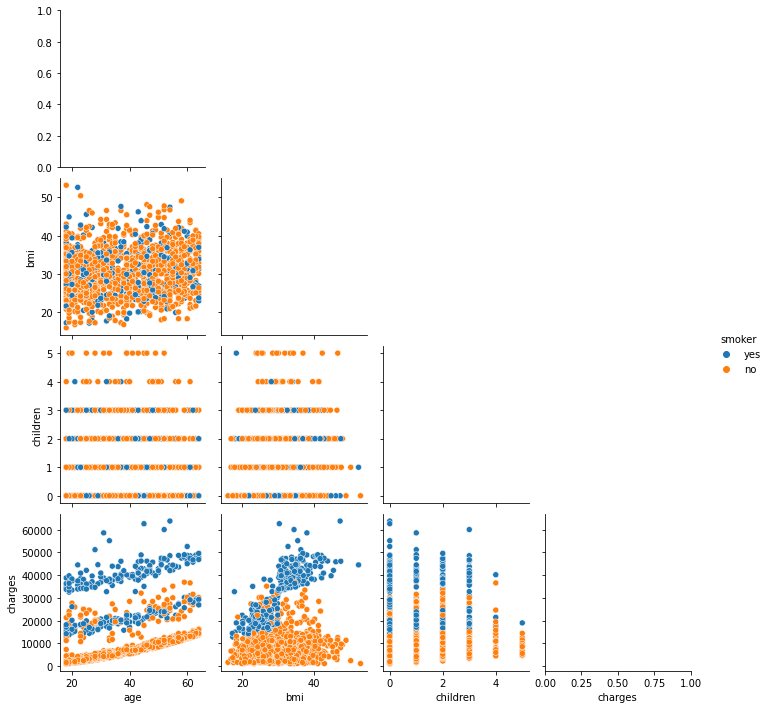

In [ ]:
#Test Your Zaka
from pandas.plotting import scatter_matrix
num_data=dataframe[['age','bmi','children','charges','smoker']]
sns.pairplot(num_data ,hue="smoker",diag_kind="scatter",corner=True)

WHat do you think is the feature that tells us the most about a person being smoker or not?

**[Share Your Zaka here]**

**Body Mass Index for non Smoking patients is higer than Smoking patients**

**Smoking patients spend more on treatment.**

Now let's see if the gender influences being a smoker or not.
<br>Hint: You can use crosstabbing and then plot distributions

smoker   no  yes
sex             
female  547  115
male    517  159


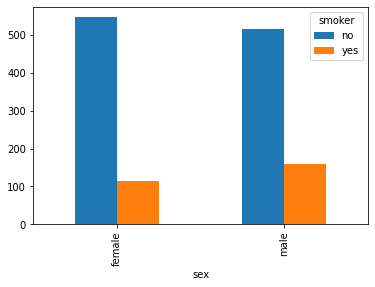

In [ ]:
#Test Your Zaka
sex=pd.crosstab(dataframe['sex'],dataframe['smoker'])
print(sex)
sex.plot(kind='bar')

Do you think the gender has an effect on smoking according to your results?

**[Share Your Zaka here]**
**The Male smoker is more than women smoker**

Do the same for the column 'region'

region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58


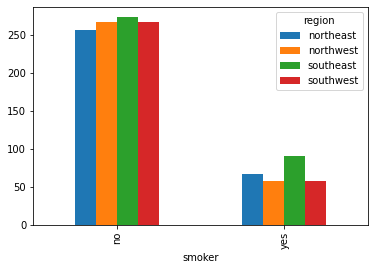

In [ ]:
#Test Your Zaka
region=pd.crosstab(dataframe['smoker'],dataframe['region'])
print(region)
region.plot(kind='bar')

**Southeast have the highst number of smokers**

## 3. Data Preprocessing
"Garbage in, garbage out".

Data should be preprocessed and cleaned to get rid of noisy data.
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



---



 Let's start by seeing if we have missing data.

In [ ]:
#Test Your Zaka
# print how many missing value in each column
dataframe.isnull().sum()

age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64

Drop rows with missing values, and make sure you have no nulls anymore.

In [ ]:
#Test Your Zaka
# drop rows with missing values
data = dataframe.dropna()
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

See the type of each of your columns

In [ ]:
#Test Your Zaka
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   int64  
 1   sex       1335 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   int64  
 4   smoker    1335 non-null   object 
 5   region    1335 non-null   object 
 6   charges   1335 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.4+ KB


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



In [ ]:
#Test Your Zaka
gender = {'male':0, 'female':1}
# replace sex column with 0/1
data['sex'] = data['sex'].apply(lambda x: gender[x])
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


And now the smokers column

In [ ]:
#Test Your Zaka
smokers = {'no':0, 'yes':1}
# replace smokers column with 0/1
data['smoker'] = data['smoker'].apply(lambda x: smokers[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


And now the Region Column

In [ ]:
#Test Your Zaka
Region = {'northeast':0,'northwest':1,'southeast':2,'southwest':3}
# replace Region column with 0/1/2/3
data['region'] = data['region'].apply(lambda x: Region[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


#### Normalization

Let's scale all the columns by dividing by the maximum

In [ ]:
#Test Your Zaka
# get the max of each column
data_max = data.max()
# divide each column by its maximum value
df = data.divide(data_max)
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,0.612441,0.495131,0.577102,0.219476,0.205243,0.504619,0.208299
std,0.219491,0.500164,0.114832,0.241145,0.404031,0.368180,0.190041
min,0.281250,0.000000,0.300395,0.000000,0.000000,0.000000,0.017592
25%,0.421875,0.000000,0.495059,0.000000,0.000000,0.333333,0.074365
50%,0.609375,0.000000,0.572181,0.200000,0.000000,0.666667,0.147187
75%,0.796875,1.000000,0.652880,0.400000,0.000000,0.666667,0.262144
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Model Training & Testing



#### Data splits

Before training, we need to split data into training (80%) & testing (20%), and fix the random_state parameter to 42 <br>Print the shapes of your training and testing data.

In [ ]:
#Test Your Zaka
X = df[['age','sex','bmi','children','region','charges']]
y = df['smoker']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1068, 6) (1068,)
(267, 6) (267,)


#### Logistic Regression Modeling


Define the logistic Regression model, and fit it on the training data

In [ ]:
#Test Your Zaka
# define model
model = LogisticRegression()
# train model
model.fit(x_train, y_train)
print('Model trained!')

Model trained!


#### Evaluation

Evaluate your model on the testing data, and compute: Accuracy, Precision, Recall and F1 score

In [ ]:
#Test Your Zaka
y_pred = model.predict(x_test)

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(model, x_test, y_test, cv=3, scoring=['accuracy','precision', 'recall', 'f1_macro'])
accuracy_1 = scores.get('test_accuracy').mean()
precision_1 = scores.get('test_precision').mean()
recall_1 = scores.get('test_recall').mean()
f1_1 = scores.get('test_f1_macro').mean()

print("Accuracy:", accuracy_1,
      "\nPrecision:",precision_1,
      "\nRecall:", recall_1,
      "\nF1 Score:", f1_1)

Accuracy: 0.9063670411985019 
Precision: 1.0 
Recall: 0.613997113997114 
F1 Score: 0.8496958415893167


Which metrics you think can be improved?

**[Share your Zaka here]** **Recall and F1 Score**


##5. Model Improvement

Now we will try to improve the model that we built.

####Handle data Imbalance

Plot a histogram that shows the numbers of smokers and non smokers

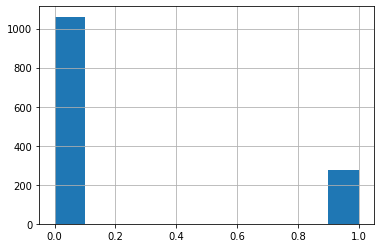

In [ ]:
#Test Your Zaka
df['smoker'].hist()

We can see that we have a clearly imbalanced dataset. To handle it, we choose to do 2 steps:
* Oversampling the minority class with a factor of 0.5
* Undersampling the majority class to obtain the same number in the 2 classes
<br>
We do that by using the RandomOverSaampler and RandomUnderSampler from the imblearn library.

In [ ]:
#Test Your Zaka
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
over = RandomOverSampler(sampling_strategy= 0.5)
x_over, y_over = over.fit_resample(X, y)
under = RandomUnderSampler(sampling_strategy= 1)
x_under, y_under = under.fit_resample(x_over, y_over)

Plot a new histogram on the new data we have.

0.0    530
1.0    530
Name: smoker, dtype: int64

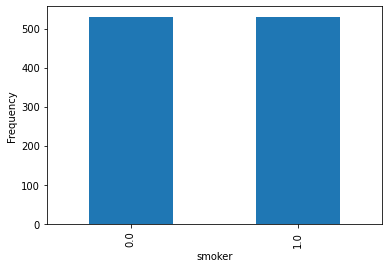

In [ ]:
#Test Your Zaka
pd.value_counts(y_under).plot.bar()
plt.xlabel('smoker')
plt.ylabel('Frequency')
y_under.value_counts()

Split the new data you obtained (80%, 20%), and build a Logistic Regression mode, and fit it on this data. Fix the random_state at 42

In [ ]:
#Test Your Zaka
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_under, y_under, test_size=0.2, random_state=42)
print(x_train_new.shape, y_train_new.shape)
print(x_test_new.shape, y_test_new.shape)

(848, 6) (848,)
(212, 6) (212,)


In [ ]:
model1= LogisticRegression()
model1.fit(x_train_new, y_train_new)
print('Model trained!')

Model trained!


Asses your model on the testing data, and Compute the same metrics you computed before

In [ ]:
#Test Your Zaka
y_pred_new = model1.predict(x_test_new)

In [ ]:
scores2 = cross_validate(model1, x_test_new, y_test_new, cv=3, scoring=['accuracy','precision', 'recall', 'f1_macro'])
New_accuracy_1 = scores2.get('test_accuracy').mean()
New_precision_1 = scores2.get('test_precision').mean()
New_recall_1 = scores2.get('test_recall').mean()
New_f1_1 = scores2.get('test_f1_macro').mean()
print("Accuracy:", New_accuracy_1,
      "\nPrecision:",New_precision_1,
      "\nRecall:", New_recall_1,
      "\nF1 Score:", New_f1_1)

Accuracy: 0.8631120053655265 
Precision: 0.9063492063492063 
Recall: 0.7878787878787877 
F1 Score: 0.8607637634637242


We can see how much our scores got better when we balanced our dataset.

**The Accuracy & Precision were decreases while Recall & F1 Score were improved**

####Regularization with Hyperparameter Tuning

We will be tuning the hyperparameter C in the logistic regression model that we used. This hyperparameter represents regularization.
<br><img src="https://equatio-api.texthelp.com/svg/C%5C%20%3D%5C%20%5Cfrac%7B1%7D%7B%5Clambda%7D" alt="C equals 1 over lamda">

The possible values of C will be: [0.1, 1, 10, 100, 1000]

We will also know have to decide what type of regularization we will use: L1, or L2.

Since we have several parameters to tune, we will be doing what we call a GridSearch, to search for the best model having the best pair of hyperparameters.
We will be doing a 5 folds cross validation

Note: Specify the solver='liblinear' in your LogisticRegression model, and this is because other solvers do not support L1 regularization.

Print the best score and the best parameters

In [ ]:
#Test Your Zaka
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
grid={"C":np.logspace(0.1, 1, 10, 100, 1000), "penalty":["l1","l2"],'solver': ['liblinear']}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(x_train_new, y_train_new)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 15.848931924611136, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.9834806822137139


In [ ]:
logreg2=LogisticRegression(C=63.0957,penalty="l1",solver='liblinear')
logreg2.fit(x_train_new,y_train_new)

LogisticRegression(C=63.0957, penalty='l1', solver='liblinear')

Let's assess the model's performance in general for the best specified hyperparameters using the same metrics we used earlier.

In [ ]:
#Test Your Zaka
y_pred_new_logreg = logreg2.predict(x_test_new)
scores_logreg = cross_validate(logreg2, x_test_new, y_test_new, cv=5, scoring=['accuracy','precision', 'recall', 'f1_macro'])
New_accuracy_logreg = scores_logreg.get('test_accuracy').mean()
New_precision_logreg = scores_logreg.get('test_precision').mean()
New_recall_logreg = scores_logreg.get('test_recall').mean()
New_f1_logreg = scores_logreg.get('test_f1_macro').mean()

print("Accuracy:", New_accuracy_logreg,
      "\nPrecision:",New_precision_logreg,
      "\nRecall:", New_recall_logreg,
      "\nF1 Score:", New_f1_logreg)

Accuracy: 0.9527131782945737 
Precision: 0.9275926971579145 
Recall: 0.9800000000000001 
F1 Score: 0.9526725521280257


We can see that the results improved compared to the last model we built.

####AdaBoost Classifier

Now, we will work on improving our model, but this time through using ensemble methods, and what we will use for today is Adaboost.

AdaBoost is a boosting ensemble method that relies on the boosting concepts that we learned about during the week.
In Adaboost, each model is learning to correct the previous model's mistakes (misclassified examples). After that, each model will have a weight that depends on how well it performed on the training data. And after that, different results are aggregated based on weighted averaging.

Create an AdaBoostClassifier Model from sklearn library with n_estimators=10, and fit it on the training data you have.

In [ ]:
#Test Your Zaka
from sklearn.ensemble import AdaBoostClassifier
AdaBoost  = AdaBoostClassifier(n_estimators=10,
                         learning_rate=1)
model_AdaBoost = AdaBoost.fit(x_train_new, y_train_new)

Asses the performance of your model on the testing data, and compute the same metrics we computed earlier.

In [ ]:
#Test Your Zaka
y_pred_AdaBoost= model_AdaBoost.predict(x_test_new)
scores_AdaBoost = cross_validate(model_AdaBoost, x_test_new, y_test_new, cv=5, scoring=['accuracy','precision', 'recall', 'f1_macro'])
New_accuracy_AdaBoost = scores_AdaBoost.get('test_accuracy').mean()
New_precision_AdaBoost = scores_AdaBoost.get('test_precision').mean()
New_recall_AdaBoost = scores_AdaBoost.get('test_recall').mean()
New_f1_AdaBoost = scores_AdaBoost.get('test_f1_macro').mean()

print("Accuracy:", New_accuracy_AdaBoost,
      "\nPrecision:",New_precision_AdaBoost,
      "\nRecall:", New_recall_AdaBoost,
      "\nF1 Score:", New_f1_AdaBoost)

Accuracy: 0.9433001107419713 
Precision: 0.9170663813684408 
Recall: 0.97 
F1 Score: 0.9431870351240743


**BONUS:** One thing you can try on your own, is to tune the Hyperparameters of the Adaboost algorithm, and build an even more powerful model :)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42),n_estimators=10,learning_rate=1,random_state=42)
clf.fit(x_train_new, y_train_new)
clf.score(x_test_new, y_test_new)

0.9622641509433962

In [ ]:
y_pred_AdaBoost= clf.predict(x_test_new)
scores_AdaBoost2 = cross_validate(clf, x_test_new, y_test_new, cv=5, scoring=['accuracy','precision', 'recall', 'f1_macro'])
New_accuracy_AdaBoost2 = scores_AdaBoost2.get('test_accuracy').mean()
New_precision_AdaBoost2 = scores_AdaBoost2.get('test_precision').mean()
New_recall_AdaBoost2 = scores_AdaBoost2.get('test_recall').mean()
New_f1_AdaBoost2 = scores_AdaBoost2.get('test_f1_macro').mean()

print("Accuracy:", New_accuracy_AdaBoost2,
      "\nPrecision:",New_precision_AdaBoost2,
      "\nRecall:", New_recall_AdaBoost2,
      "\nF1 Score:", New_f1_AdaBoost2)

Accuracy: 0.9480620155038759 
Precision: 0.9168831168831169 
Recall: 0.9800000000000001 
F1 Score: 0.9480276020066152
